In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("../MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# Function to sampled from: n-dim gaussian with chosen sigmas and centers
cauchy1_gauss2 = function (theta) {

    sigmas = c(2.5, 4.3)
    centers = c(0.4, 9)

    product = 1
    for (i in 1:2) {
        product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
    }

    product = product * (dcauchy(theta[3], -10, 2) + 4*dcauchy(theta[3], 10, 4))

    return (product)

} 

chosen_function = cauchy1_gauss2

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(2, 4, 10)
std = diag(1, 3)

N = as.integer(1e5)
burn_in = as.integer(1e4)

print_step = as.integer(1e2)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  76.18091 %


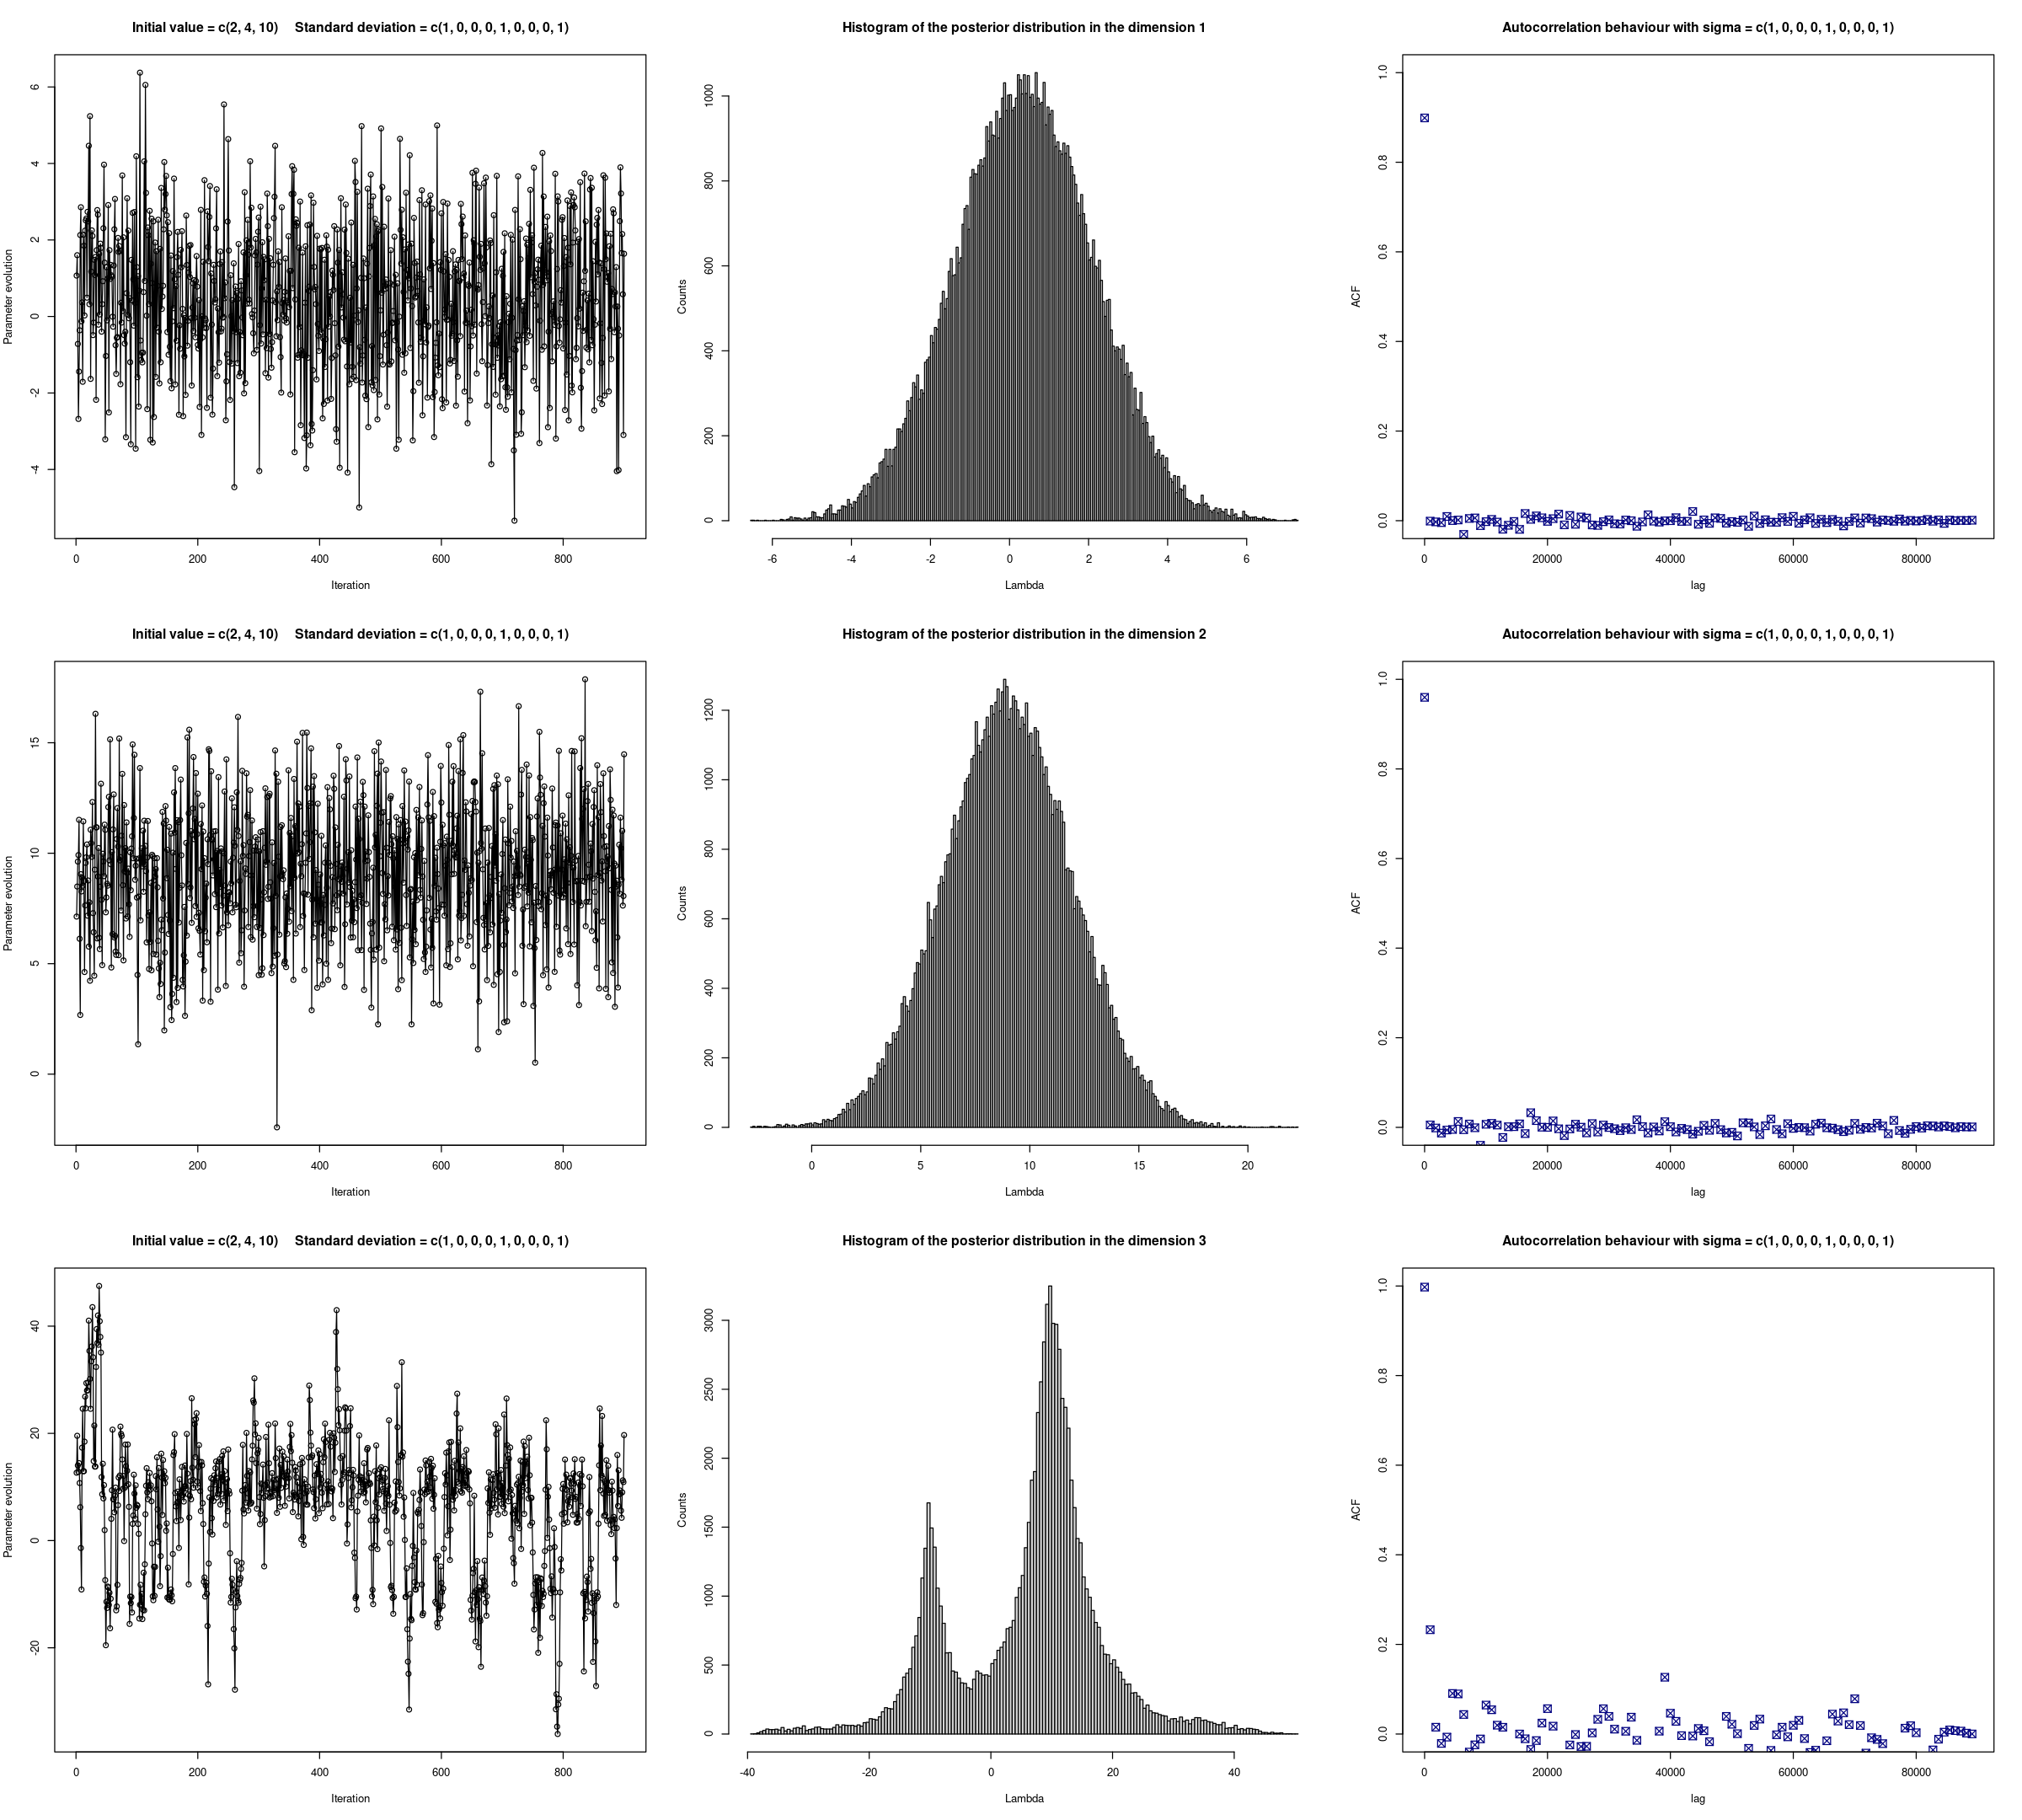

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  83.91242 %


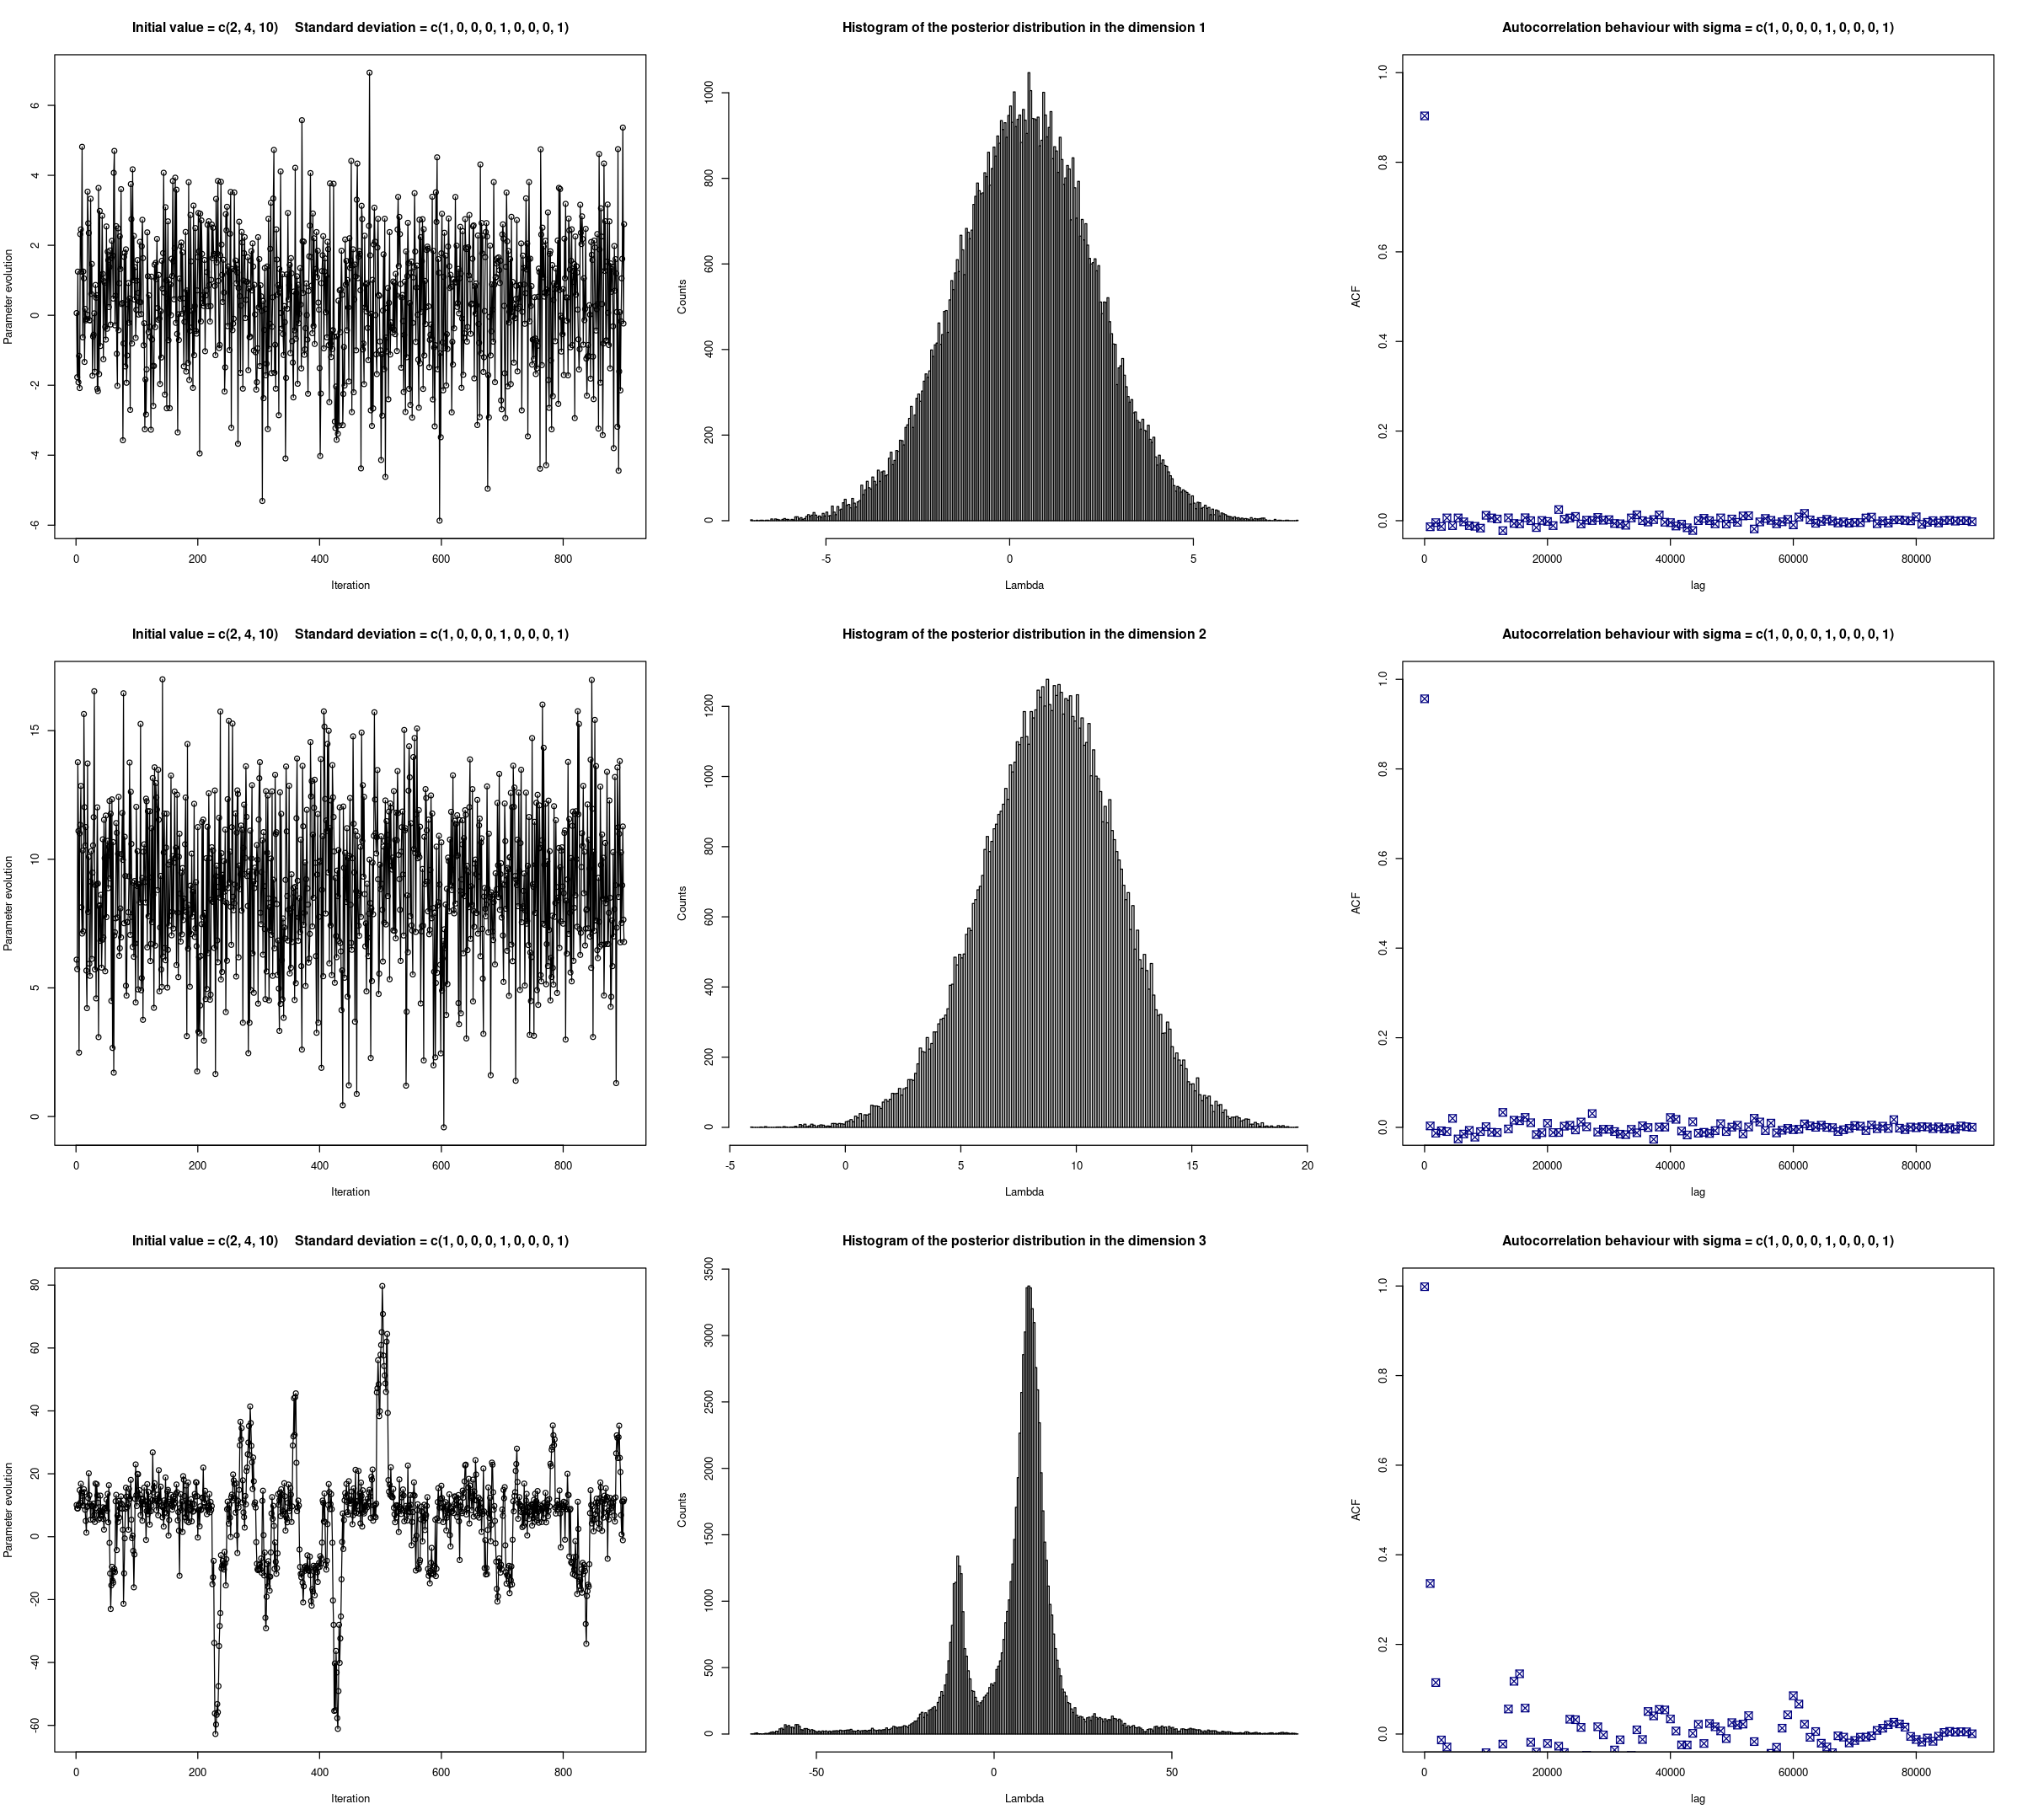

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  16 %
Final mean =  0.4328134 9.036822 4.3073 
Final covariance matrix = 
          [,1]      [,2]        [,3]
[1,]  6.506382  14.85932    9.525963
[2,] 14.859324 299.40656  168.444215
[3,]  9.525963 168.44422 1646.937998


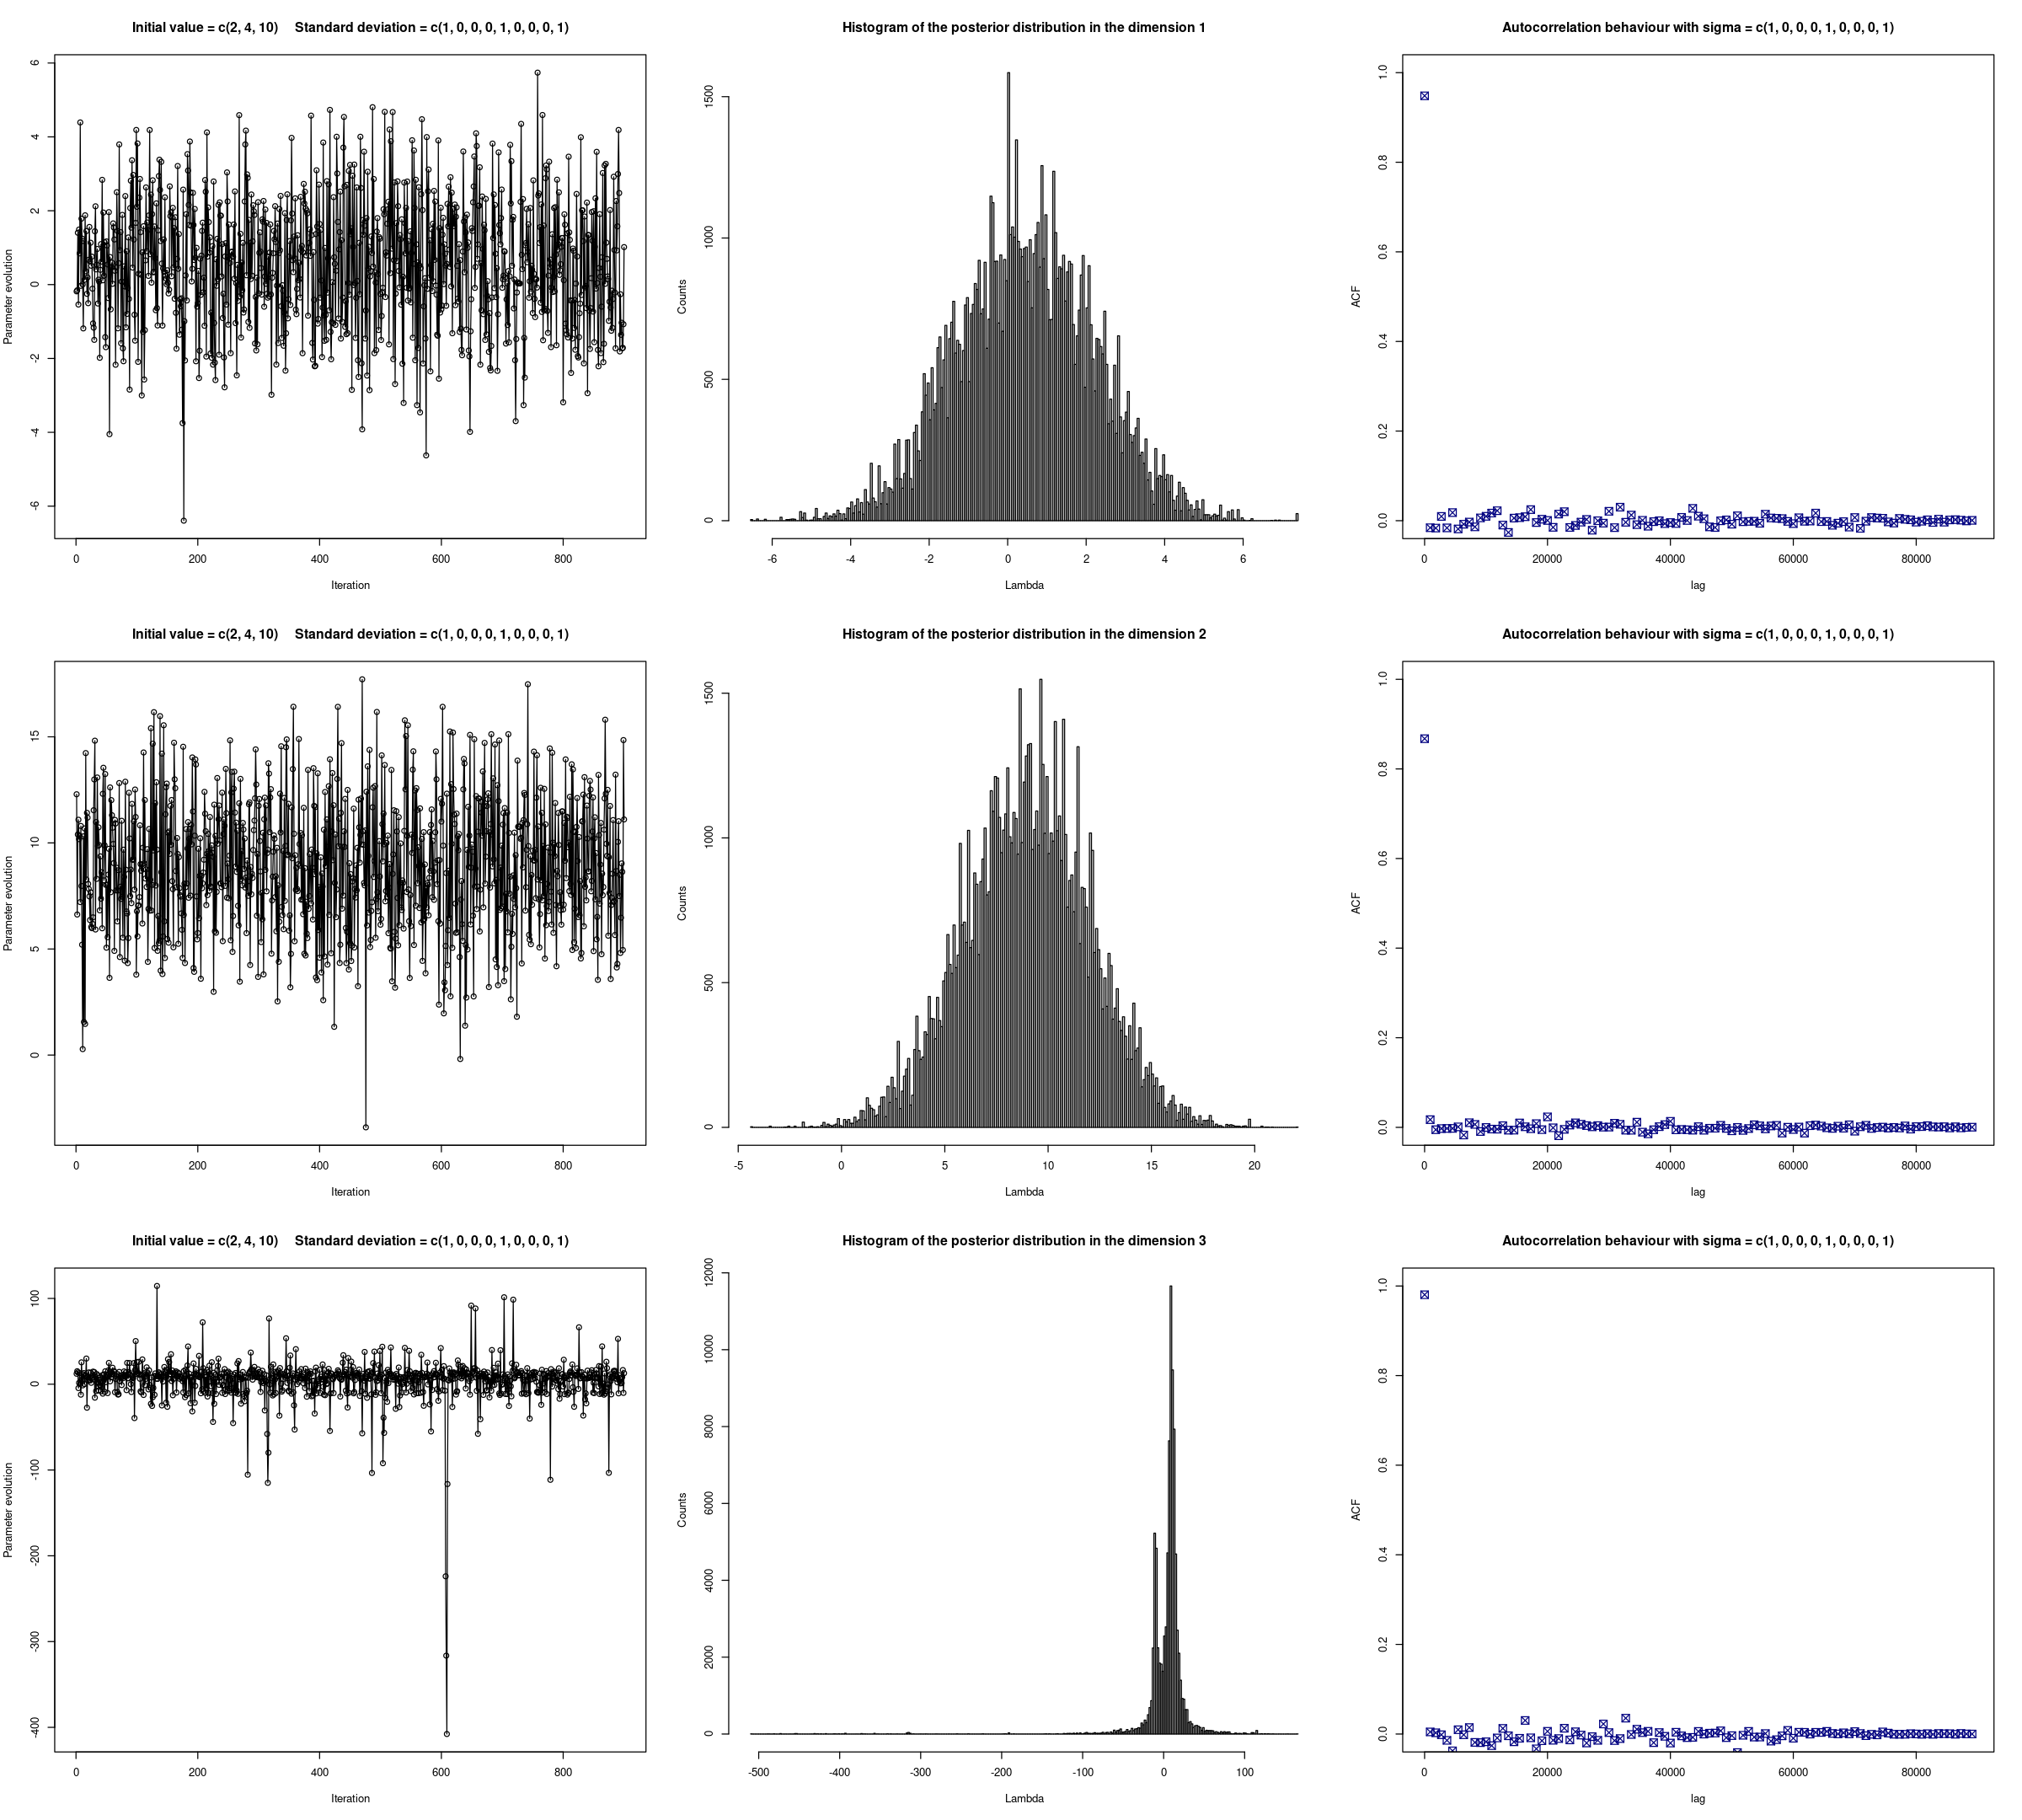

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  35.21758 %
Final mean =  0.3913999 8.994166 5.855131 
Final covariance matrix = 
          [,1]      [,2]       [,3]
[1,]  6.520784  11.58112   7.037442
[2,] 11.581121 290.83924 173.737934
[3,]  7.037442 173.73793 415.090056


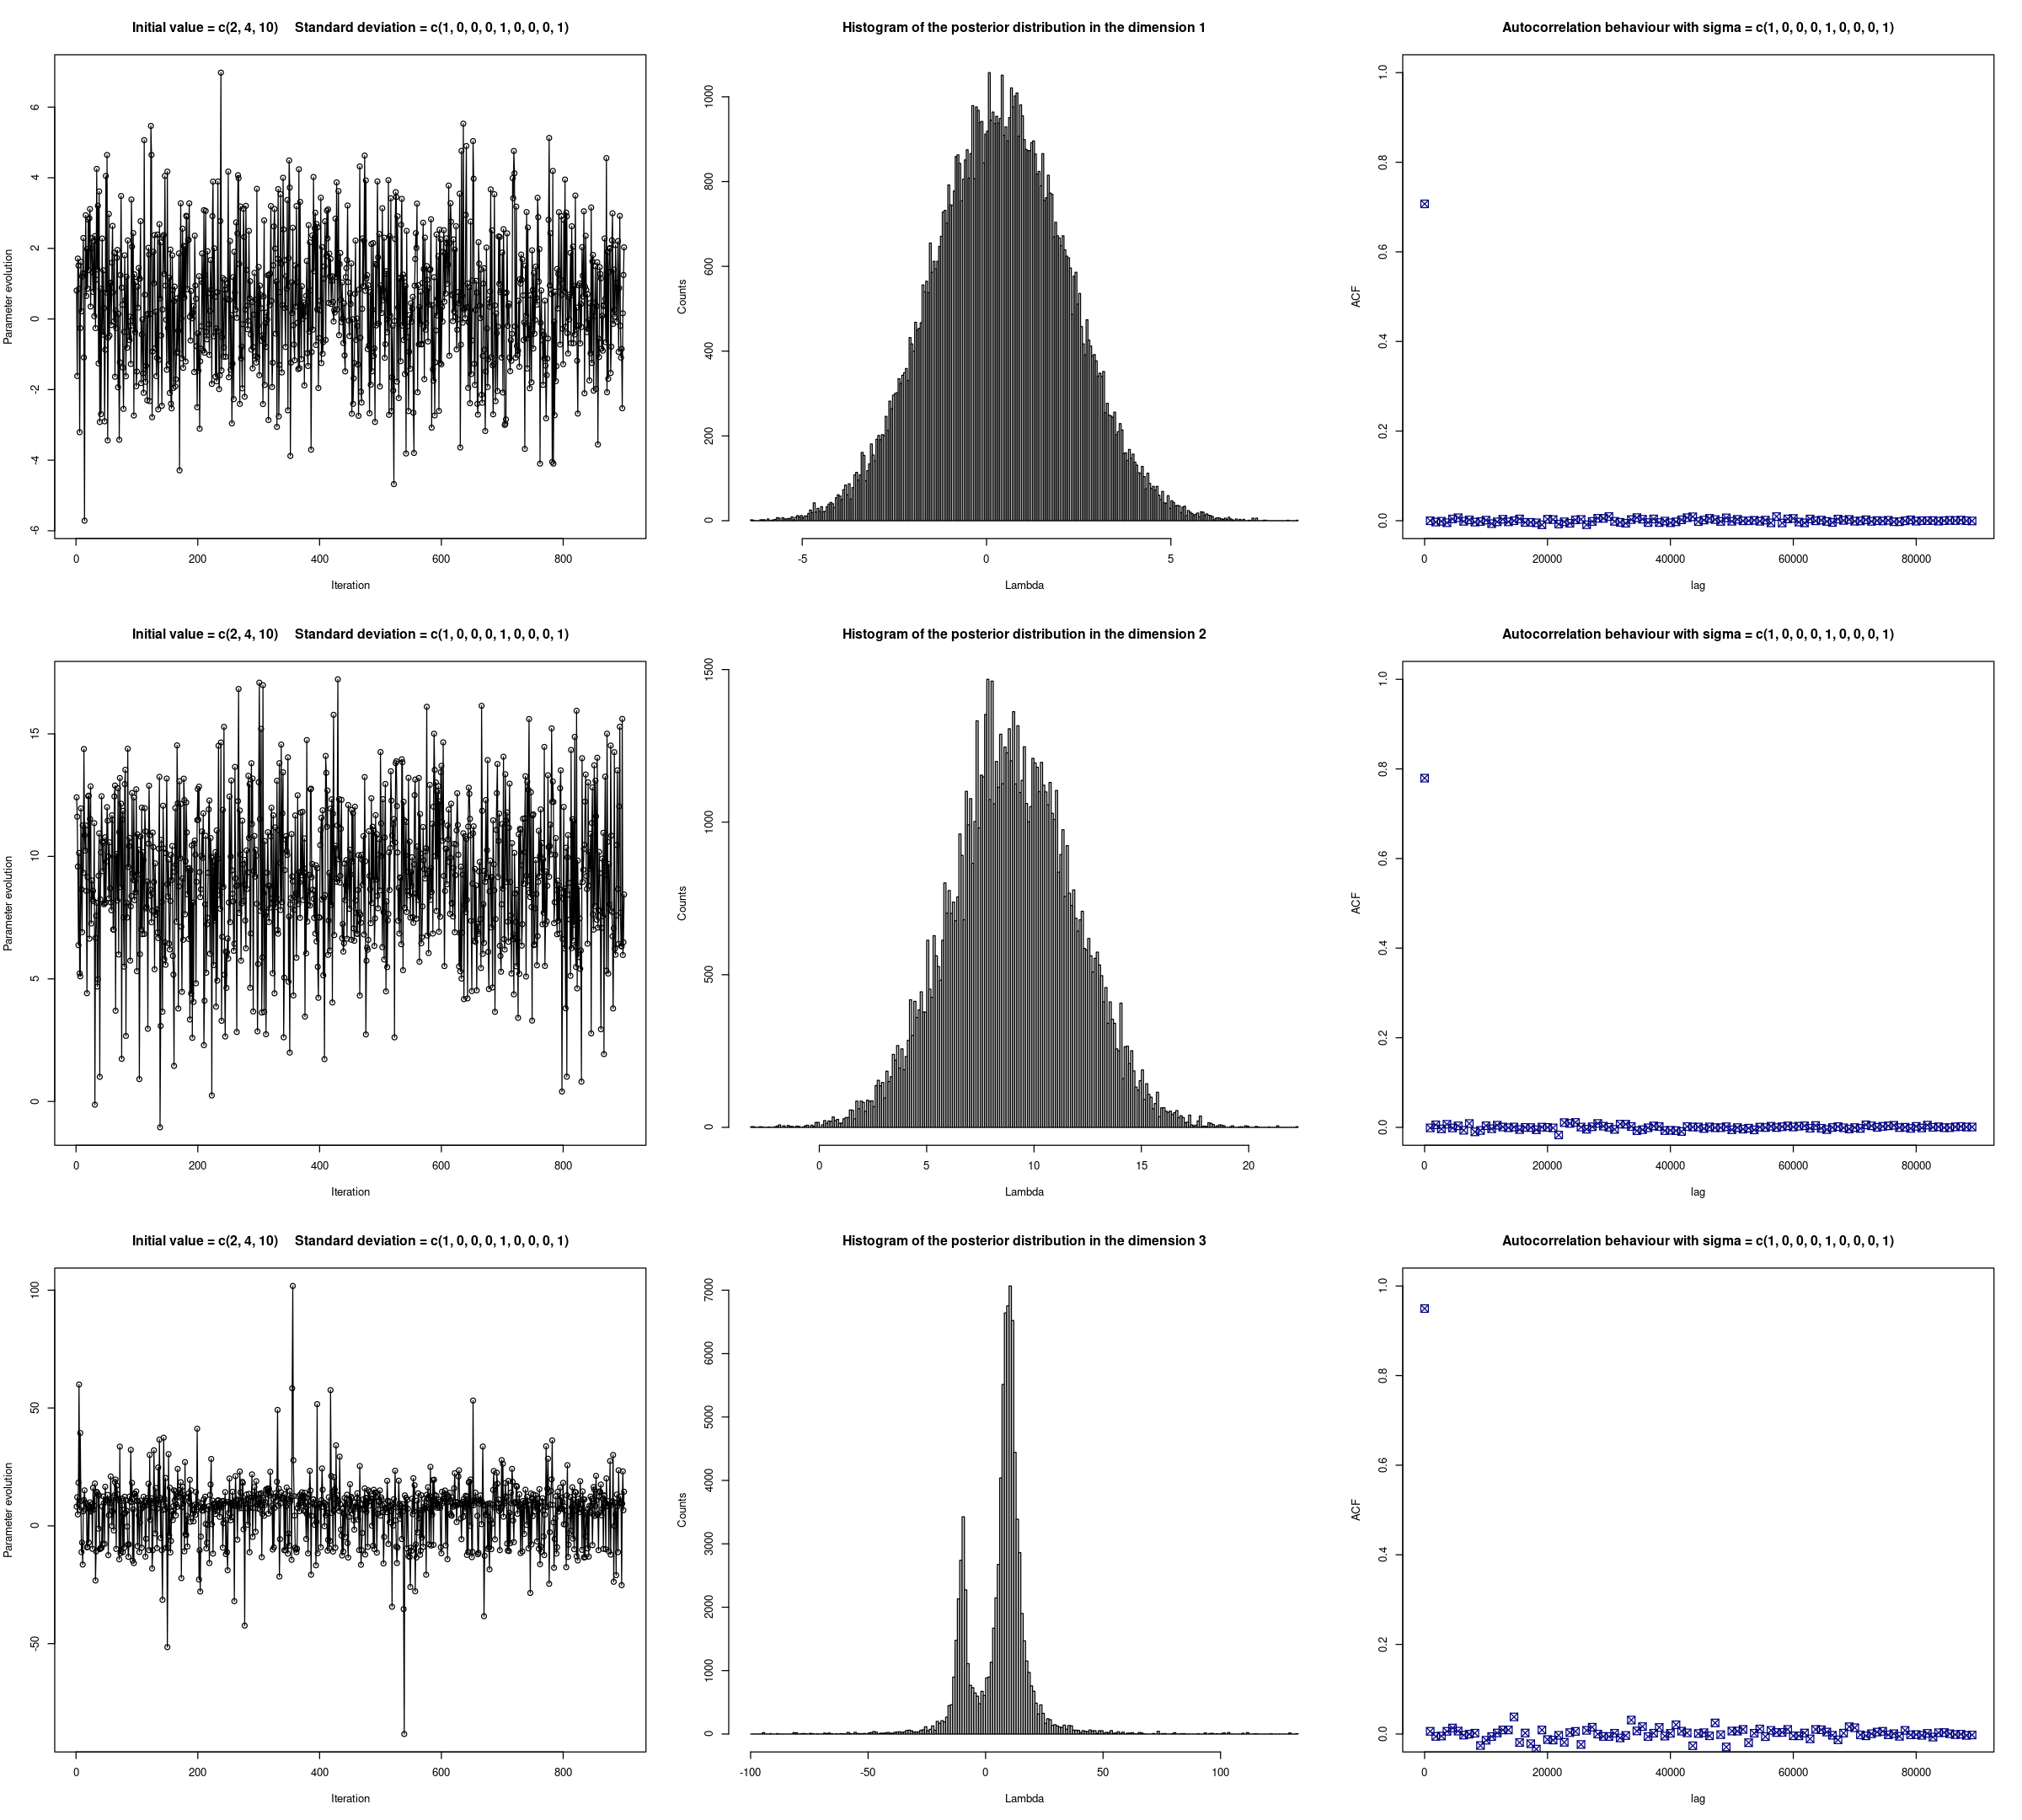

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  41.77273 %
Final mean =  0.4052241 9.047746 5.038859 
Final covariance matrix = 
            [,1]        [,2]        [,3]
[1,]  2.86526520 -0.05085621   0.1142674
[2,] -0.05085621  9.34893337   0.6209560
[3,]  0.11426739  0.62095596 481.2457763


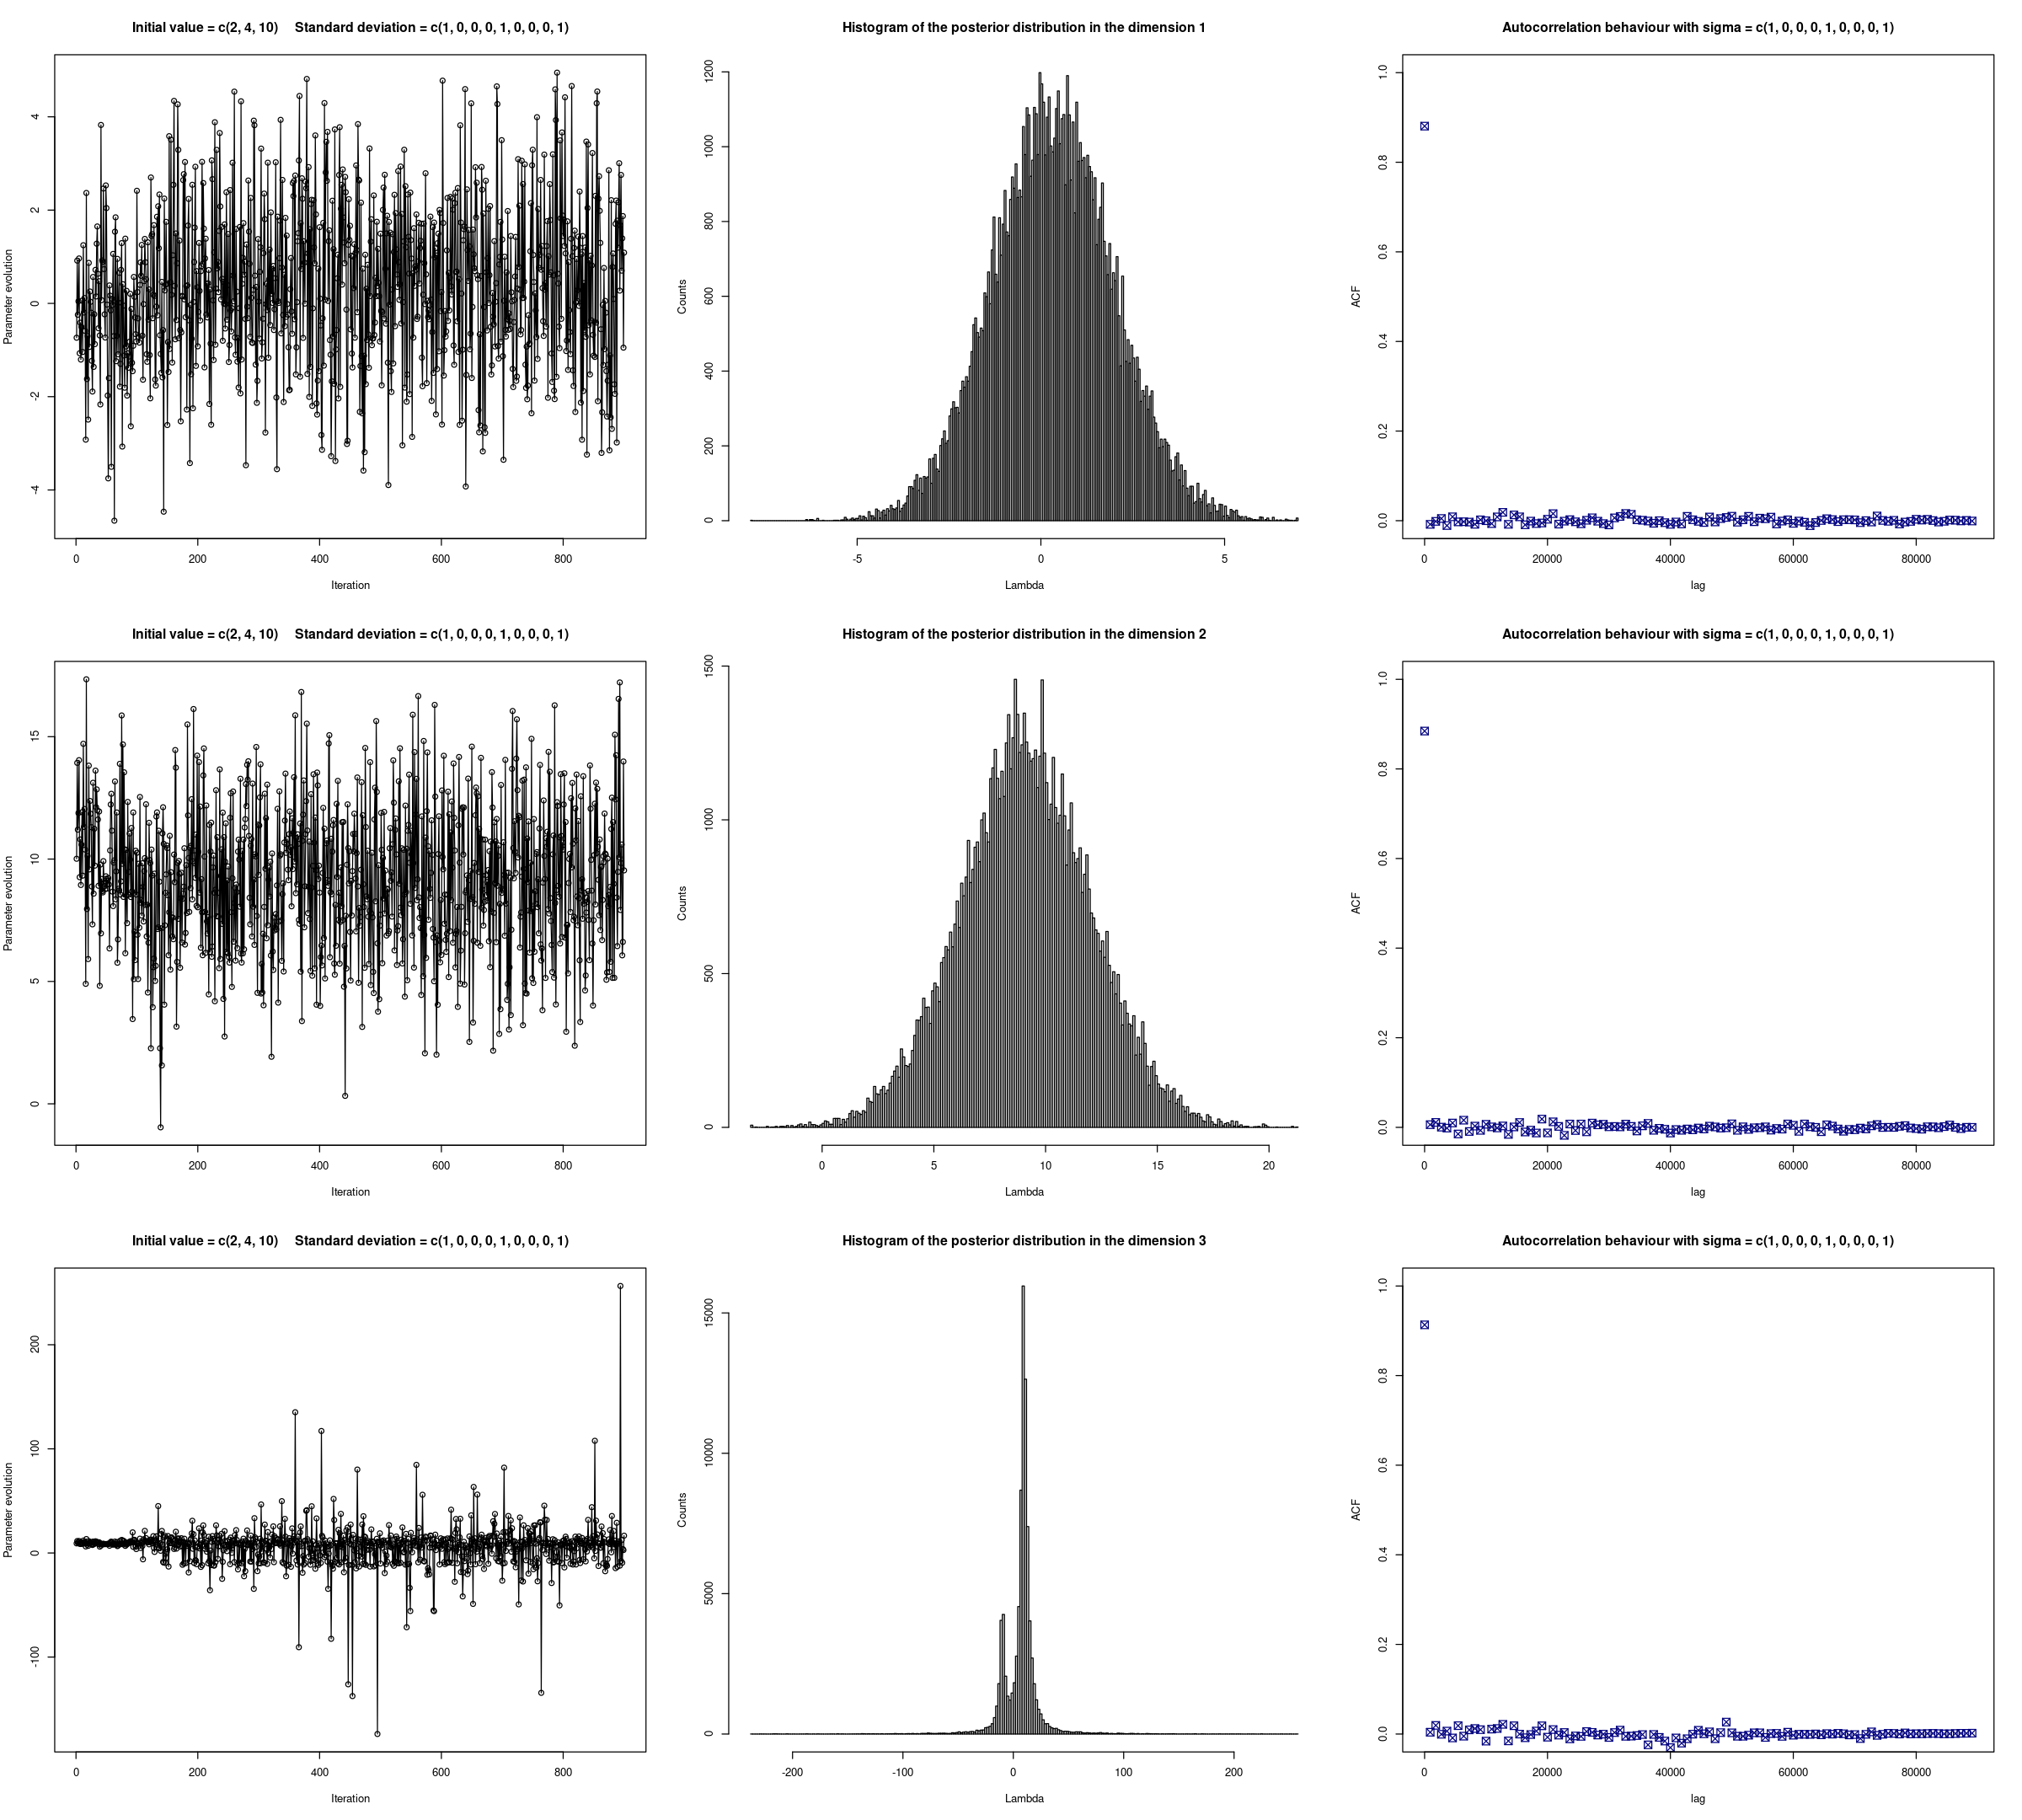

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  58.69273 %
Final mean =  0.3695703 9.156662 5.665899 
Final covariance matrix = 
            [,1]        [,2]        [,3]
[1,]  3.63056342 -0.01735925   0.6926269
[2,] -0.01735925  8.22081098   0.7263854
[3,]  0.69262685  0.72638536 641.9552407


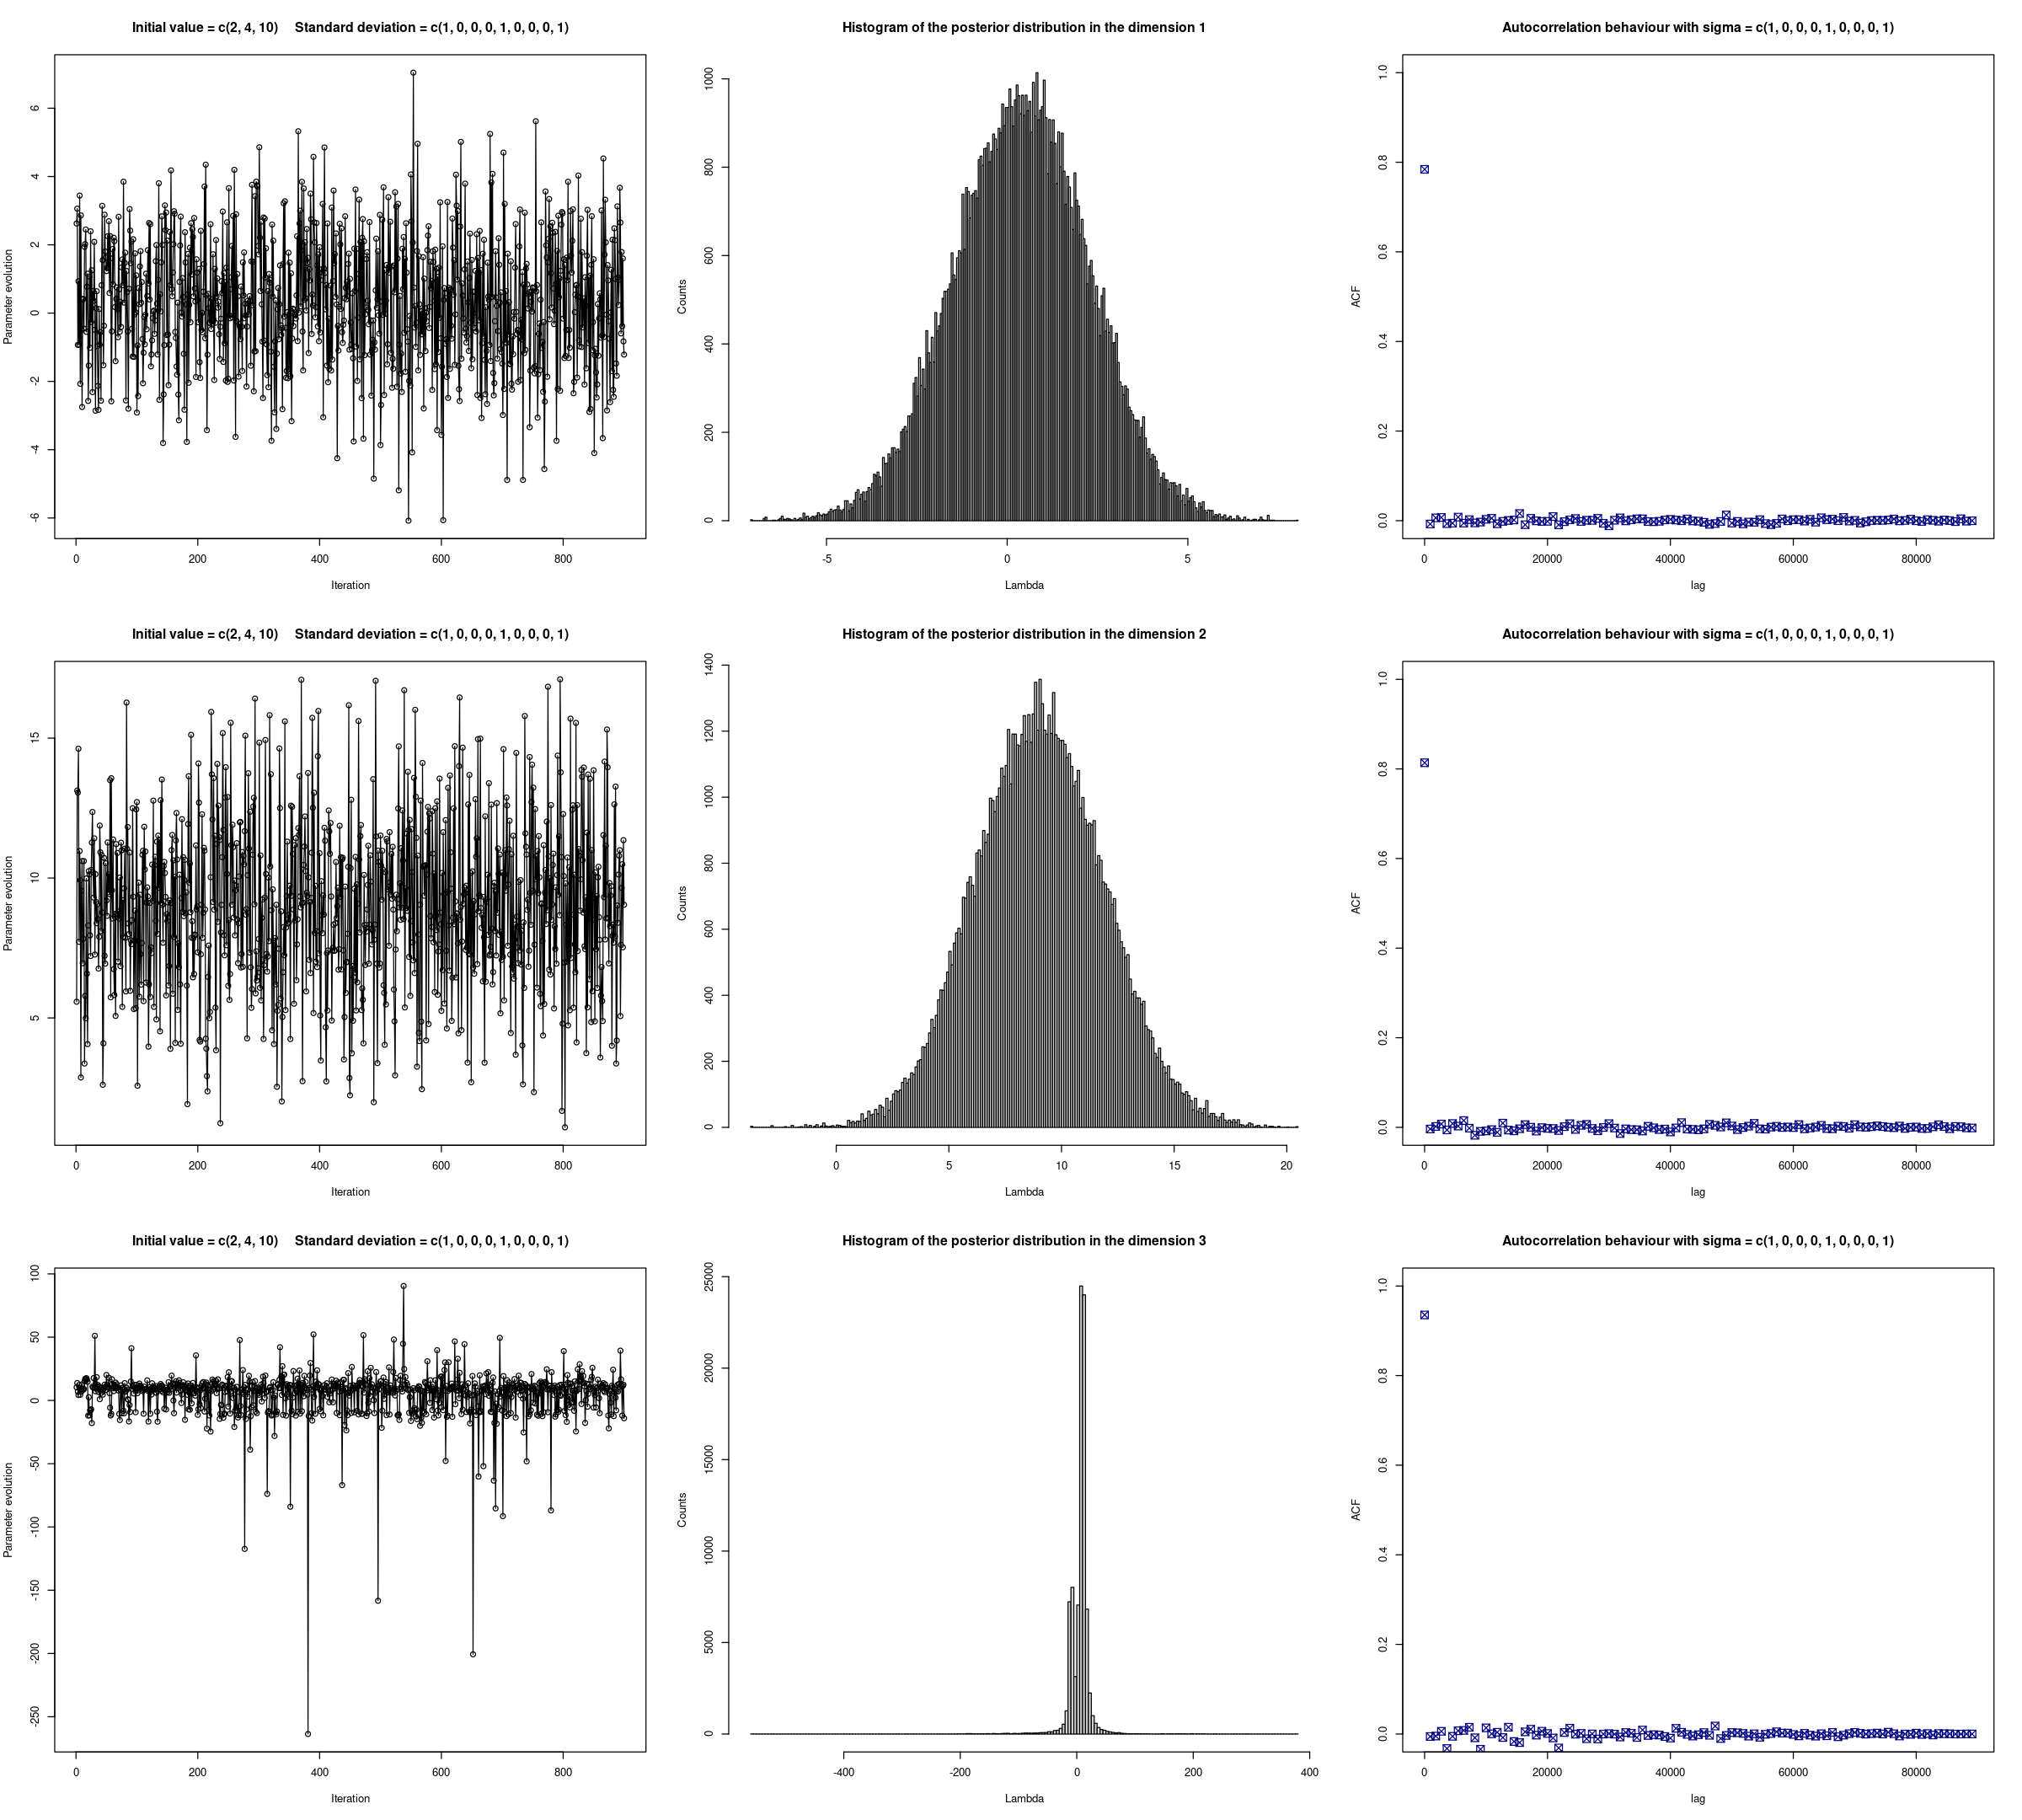

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  56.22273 %
Final mean =  0.2136796 9.033715 3.449374 
Final lambda =  -0.3776666 
Final covariance matrix = 
           [,1]        [,2]         [,3]
[1,]  2.7605325 -0.16512207  -1.14243349
[2,] -0.1651221  8.37520195   0.06110387
[3,] -1.1424335  0.06110387 509.04241798


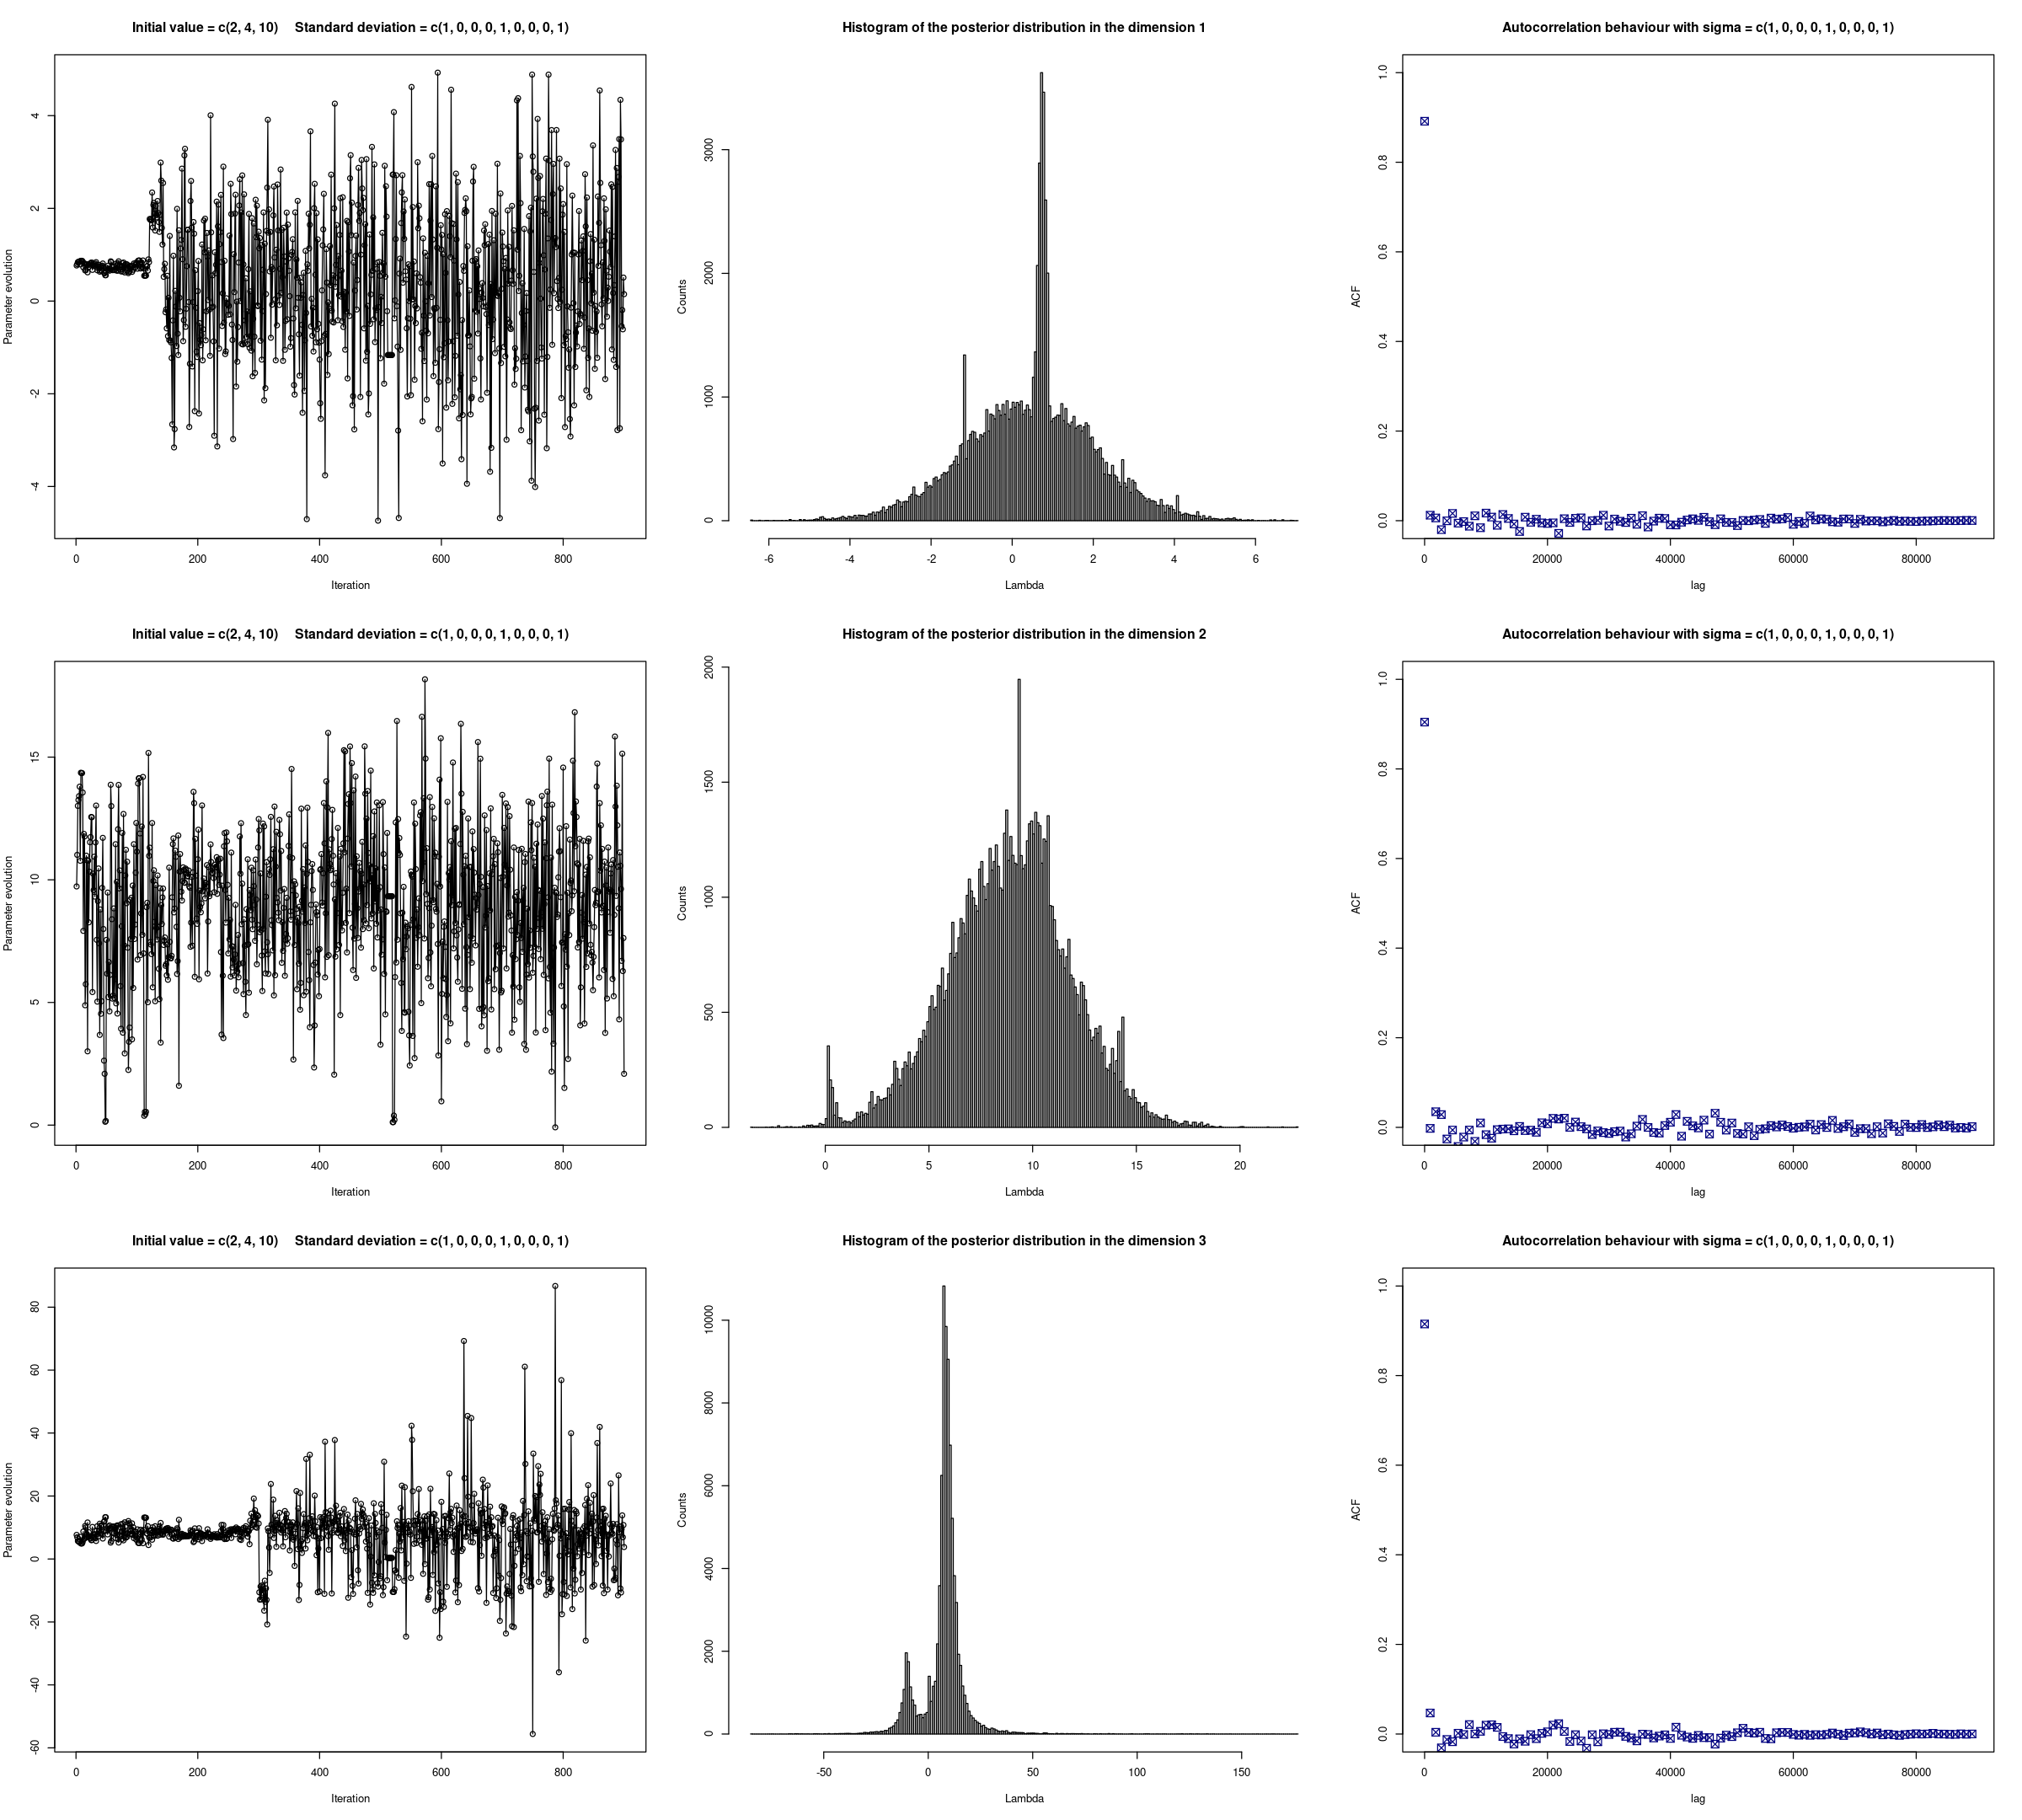

In [13]:
# GLOBAL

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  69.60636 %
Final mean =  0.3020662 8.749736 6.117085 
Final lambda =  -0.9571538 
Final covariance matrix = 
           [,1]       [,2]        [,3]
[1,]  3.5399063 -0.2239017   1.2287552
[2,] -0.2239017  8.8077707   0.6540707
[3,]  1.2287552  0.6540707 178.6227955


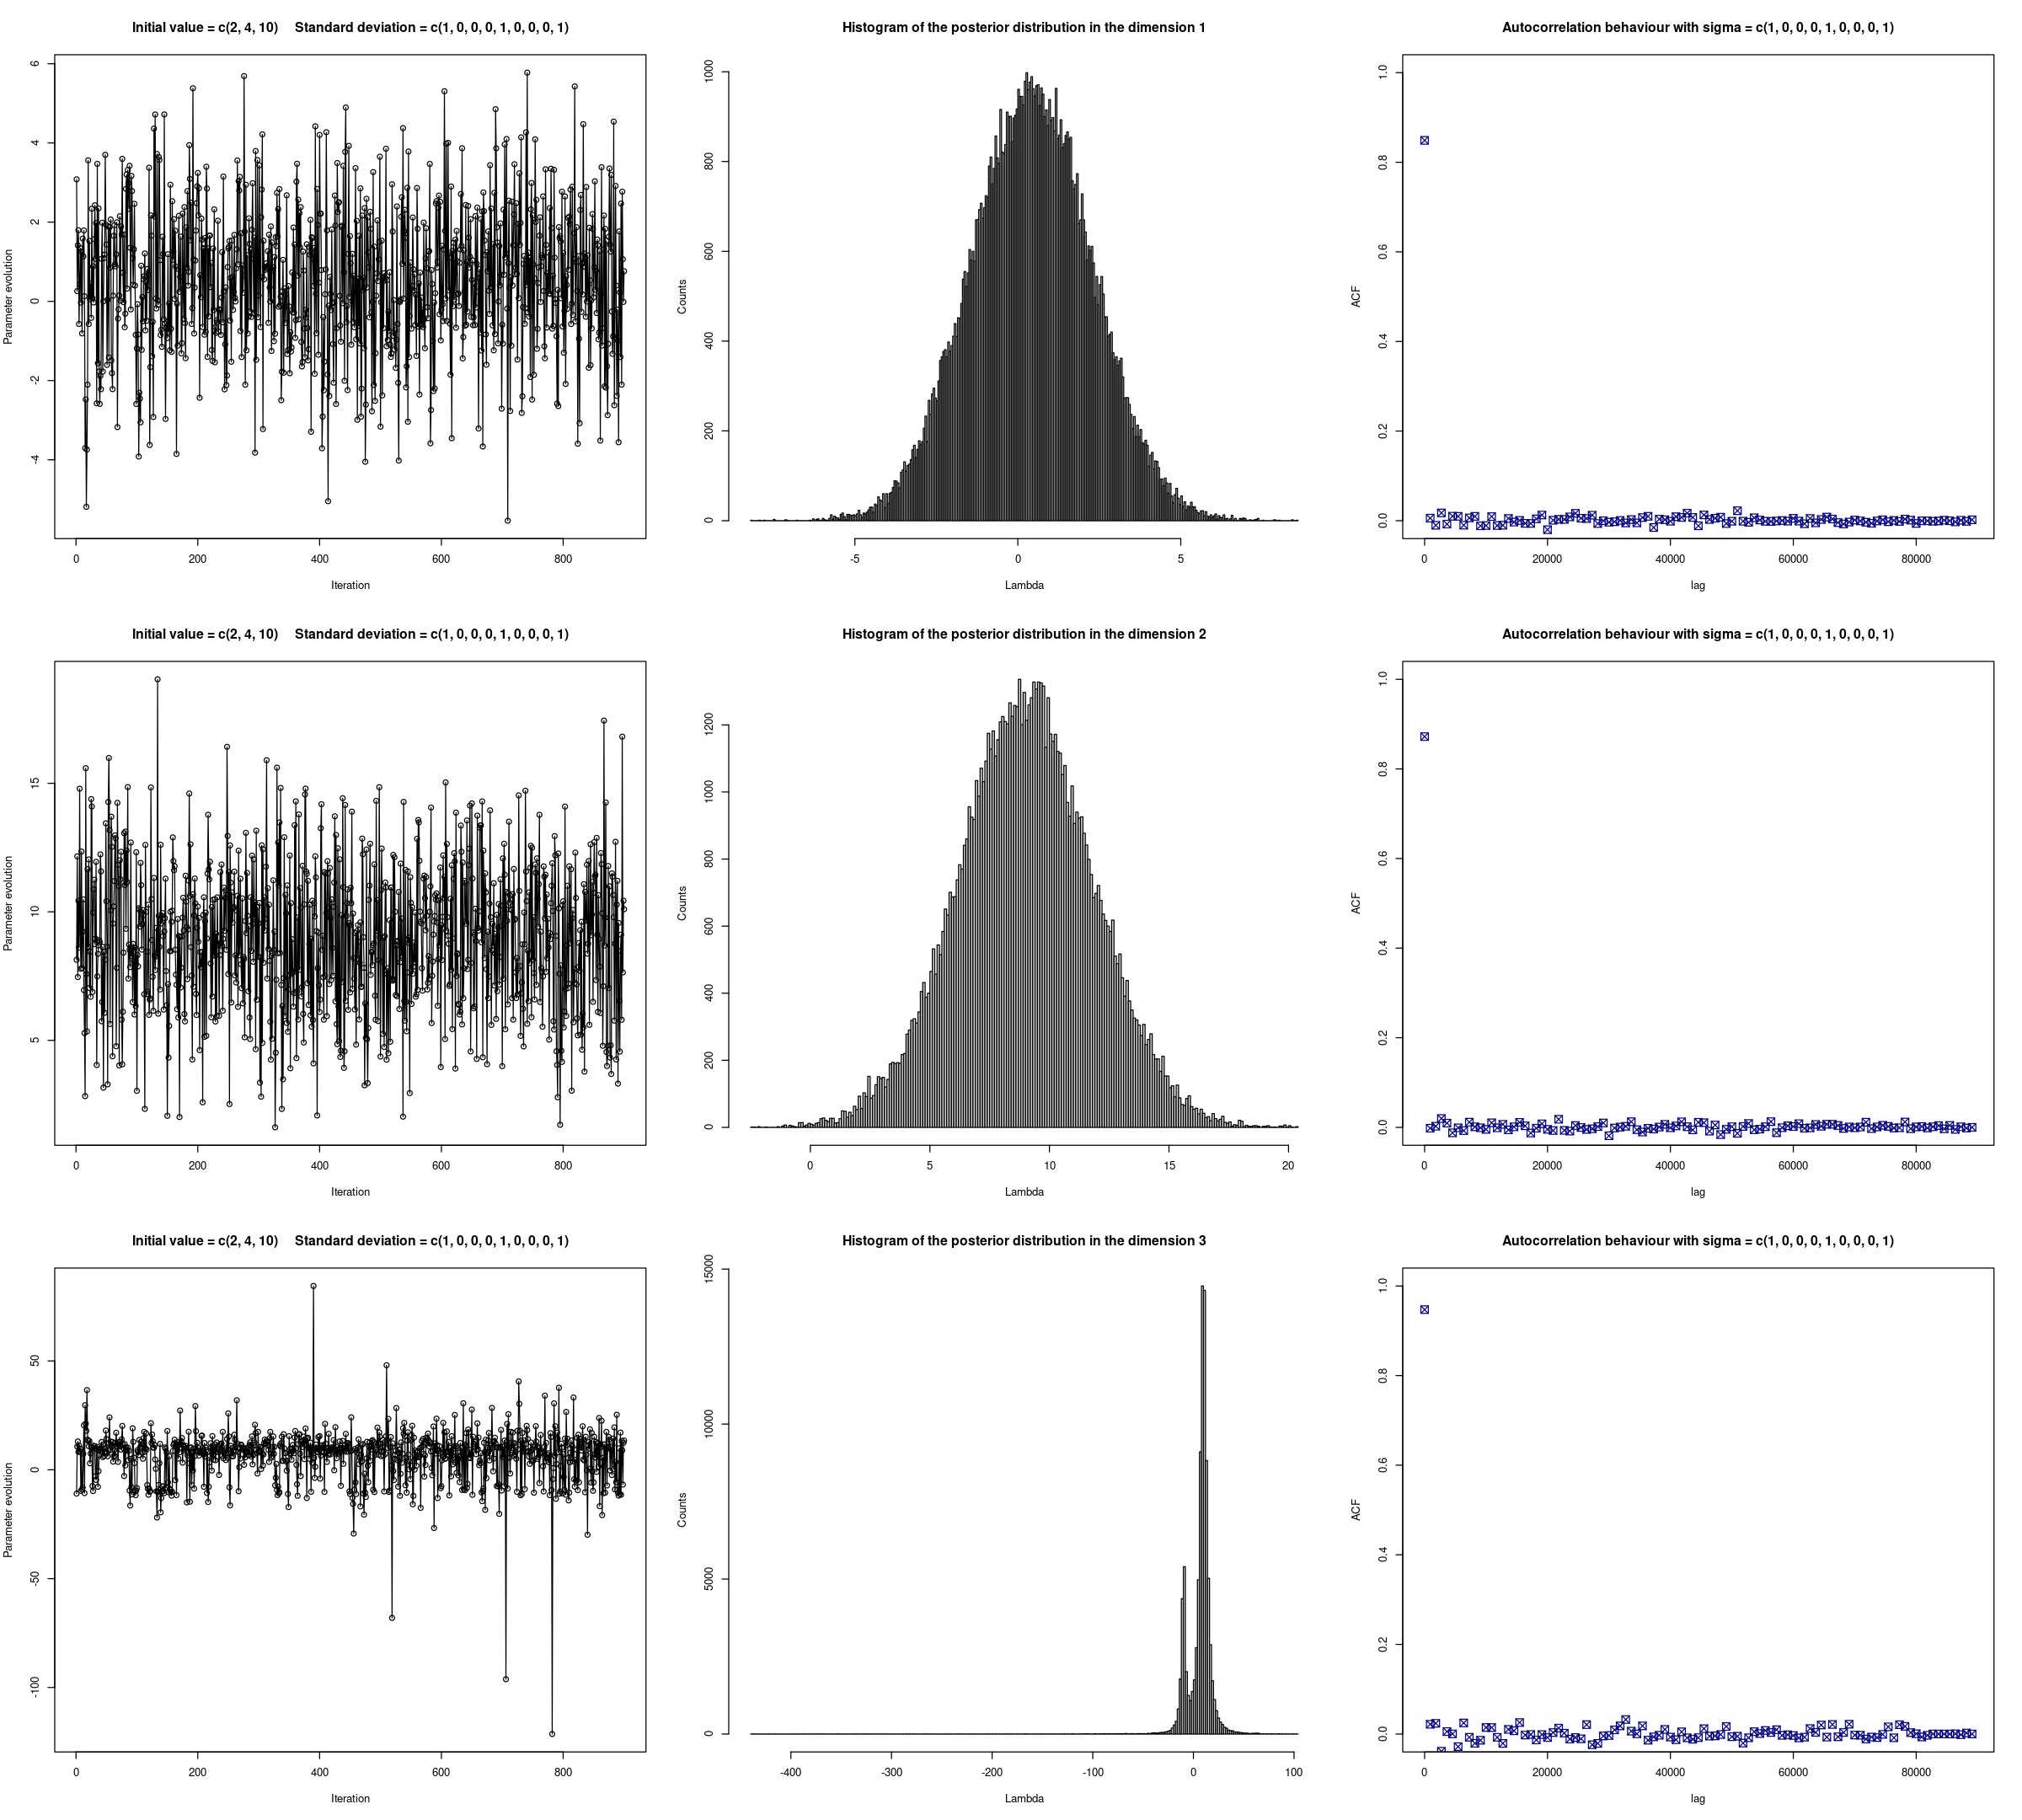

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)